### Scientology
- Muhammad Rafi D
- Danang Putra R
- Achmad Auzan Zulkarami
- Mohammad Ali

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Describe & Cleansing

In [2]:
df = pd.read_csv('data/flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [4]:
df.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [22]:
df_clean = df.drop(columns=['WORK_CITY','WORK_PROVINCE'], axis=1)
df_clean.dropna(inplace=True)
df_clean.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

In [42]:
numerical = df_clean.select_dtypes(include=['int64','float64']).columns.tolist()
categorical = df_clean.drop(columns=numerical, axis=1).columns.tolist()

* `WORK_CITY` dan `WORK_PROVINCE` dihilangkan karena terdapat banyak nilainya yang invalid, selain itu juga termasuk feature yang redundant
* Sisa *null* yang lain di drop karena jumlahnya yang insignifikan

# Exploratory Data Analysis

In [43]:
df_clean[numerical].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000
mean,31489.315943,4.103450,42.491108,11.964401,11041.484739,5374.941563,5662.081399,17303.810027,172.606942,68.154935,167.461556,0.324188,0.721649,12681.680953,2.759425
std,18192.014120,0.375833,9.887556,14.116064,16394.475910,8123.952605,8702.731851,21040.271177,181.234370,77.684101,123.155015,1.143987,0.184792,20597.492952,7.406240
min,2.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15714.750000,4.000000,35.000000,3.000000,2591.000000,1020.000000,833.000000,4866.750000,29.000000,23.750000,81.000000,0.000000,0.612650,2847.750000,0.000000
50%,31486.500000,4.000000,41.000000,7.000000,5800.500000,2816.000000,2826.500000,10183.000000,105.000000,45.000000,144.000000,0.000000,0.711827,6442.000000,0.000000
75%,47259.250000,4.000000,48.000000,15.000000,12975.250000,6600.000000,6912.000000,21497.500000,260.000000,82.500000,229.000000,0.000000,0.808825,14457.250000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000


In [44]:
df_clean[categorical].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,61856,61856,61856,61856,61856,61856
unique,3067,3405,2,117,1,731
top,1/13/2011,2/16/2013,Male,CN,3/31/2014,3/31/2014
freq,183,92,47298,56733,61856,956


In [45]:
df['WORK_COUNTRY'].value_counts()

CN    57748
HK      991
JP      875
KR      790
US      575
      ...  
YE        1
GT        1
RE        1
CM        1
GL        1
Name: WORK_COUNTRY, Length: 118, dtype: int64

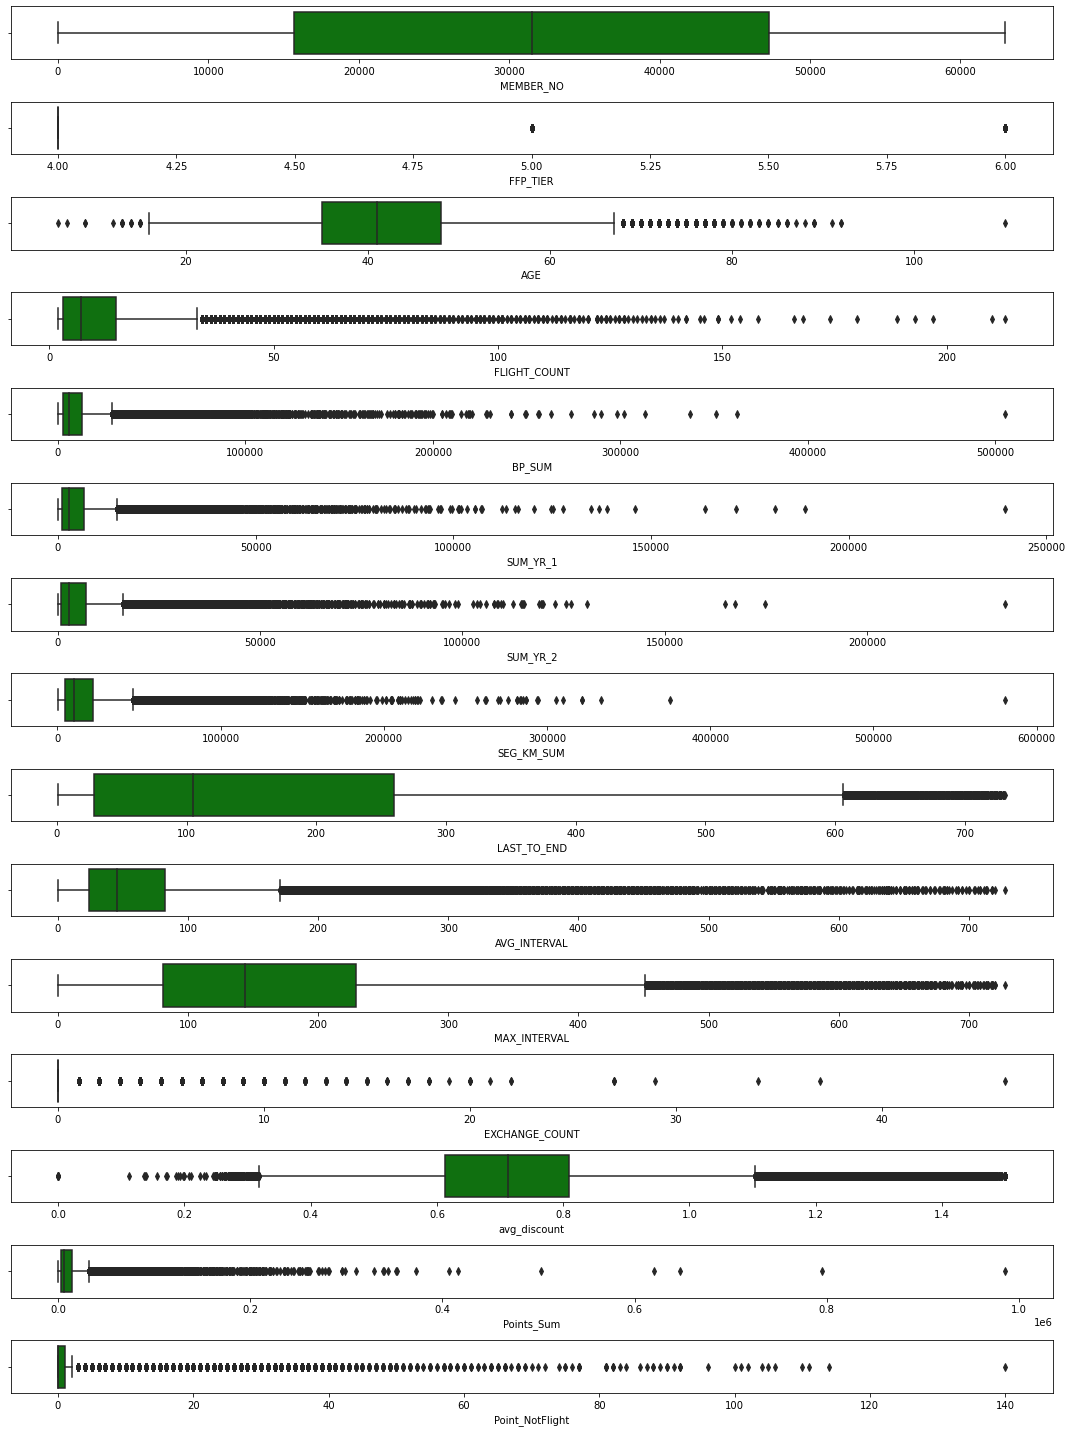

In [46]:
plt.figure(figsize=(15,20))
for i in range(0, len(numerical)):
    plt.subplot(15, len(numerical)/15, i+1)
    sns.boxplot(df_clean[numerical[i]], color='green', orient='h')
    plt.tight_layout()

# Pre-processing & Feature Engineering

In [93]:
from datetime import datetime

In [191]:
df_rfm = df[['FFP_DATE','FFP_TIER','FIRST_FLIGHT_DATE','LAST_FLIGHT_DATE','LOAD_TIME','FLIGHT_COUNT','SEG_KM_SUM','LAST_TO_END']]
df_rfm.head()

,FFP_DATE,FFP_TIER,FIRST_FLIGHT_DATE,LAST_FLIGHT_DATE,LOAD_TIME,FLIGHT_COUNT,SEG_KM_SUM,LAST_TO_END
0,11/2/2006,6,12/24/2008,3/31/2014,3/31/2014,210,580717,1
1,2/19/2007,6,8/3/2007,3/25/2014,3/31/2014,140,293678,7
2,2/1/2007,6,8/30/2007,3/21/2014,3/31/2014,135,283712,11
3,8/22/2008,5,8/23/2008,12/26/2013,3/31/2014,23,281336,97
4,4/10/2009,6,4/15/2009,3/27/2014,3/31/2014,152,309928,5


#### Pengambilan keputusan mengenai fitur yang digunakan pada model ini berdasar pada analisis RFM yaitu Recency, Frequency dan Monetary. 

In [95]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FFP_DATE           62988 non-null  object
 1   FFP_TIER           62988 non-null  int64 
 2   FIRST_FLIGHT_DATE  62988 non-null  object
 3   LAST_FLIGHT_DATE   62988 non-null  object
 4   LOAD_TIME          62988 non-null  object
 5   FLIGHT_COUNT       62988 non-null  int64 
 6   SEG_KM_SUM         62988 non-null  int64 
 7   LAST_TO_END        62988 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 3.8+ MB


In [192]:
df_rfm['FFP_DATE'] = pd.to_datetime(df_rfm['FFP_DATE'], errors='ignore')
df_rfm['FIRST_FLIGHT_DATE'] = pd.to_datetime(df_rfm['FIRST_FLIGHT_DATE'],errors='ignore')
df_rfm['LAST_FLIGHT_DATE'] = pd.to_datetime(df_rfm['LAST_FLIGHT_DATE'],errors='coerce')
df_rfm['LOAD_TIME'] = pd.to_datetime(df_rfm['LOAD_TIME'],errors='ignore')

In [193]:
df_rfm['Recent_flight'] = df_rfm['LOAD_TIME'] - df_rfm['LAST_FLIGHT_DATE']
df_rfm['Recent_flight'] = df_rfm['Recent_flight'].dt.days

In [194]:
df_rfm['Time_as_FF'] = df_rfm['LOAD_TIME'] - df_rfm['FFP_DATE']
df_rfm['Time_as_FF'] = df_rfm['Time_as_FF'].dt.days

In [195]:
df_rfm.drop(columns=['FFP_DATE','FFP_TIER','FIRST_FLIGHT_DATE','LAST_FLIGHT_DATE','LOAD_TIME','LAST_TO_END'], axis=1, inplace=True)
df_rfm

,FLIGHT_COUNT,SEG_KM_SUM,Recent_flight,Time_as_FF
0,210,580717,0.0,2706
1,140,293678,6.0,2597
2,135,283712,10.0,2615
3,23,281336,95.0,2047
4,152,309928,4.0,1816
...,...,...,...,...
62983,2,1134,295.0,1046
62984,4,8016,87.0,1484
62985,2,2594,28.0,2923
62986,2,3934,398.0,418


In [196]:
df_rfm.dropna(inplace=True)

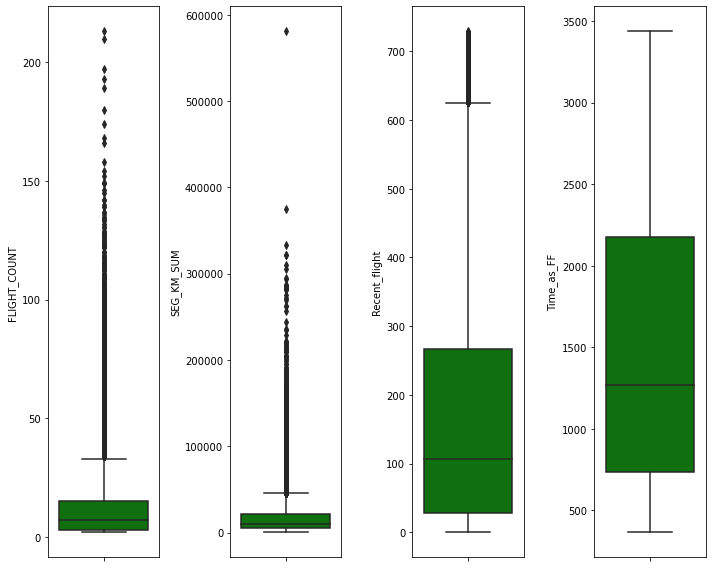

In [160]:
feature = list(df_rfm)
plt.figure(figsize=(10,8))
for i in range(0,len(feature)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df_rfm[feature[i]], color='green', orient='v')
    plt.tight_layout()

In [161]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [198]:
rfm_sc = df_rfm.copy()

In [199]:
rfm_sc['FLIGHT_COUNT'] = StandardScaler().fit_transform(df_rfm['FLIGHT_COUNT'].values.reshape(len(df_rfm),1))
rfm_sc['SEG_KM_SUM'] = StandardScaler().fit_transform(df_rfm['SEG_KM_SUM'].values.reshape(len(df_rfm),1))
rfm_sc['Recent_flight'] = StandardScaler().fit_transform(df_rfm['Recent_flight'].values.reshape(len(df_rfm),1))
rfm_sc['Time_as_FF'] = StandardScaler().fit_transform(df_rfm['Time_as_FF'].values.reshape(len(df_rfm),1))

## Dimensional Reduction

In [176]:
from sklearn.decomposition import PCA

In [202]:
pca = PCA(n_components=2)
pca.fit(rfm_sc)

pcs = pca.transform(rfm_sc)
data_pca = pd.DataFrame(data=pcs, columns=['PC1','PC2'])
data_pca.head()

,PC1,PC2
0,25.997419,4.558595
1,14.462335,1.996456
2,13.945190,1.855677
3,8.560870,1.376252
4,15.258833,3.121903


# Modelling

<AxesSubplot:>

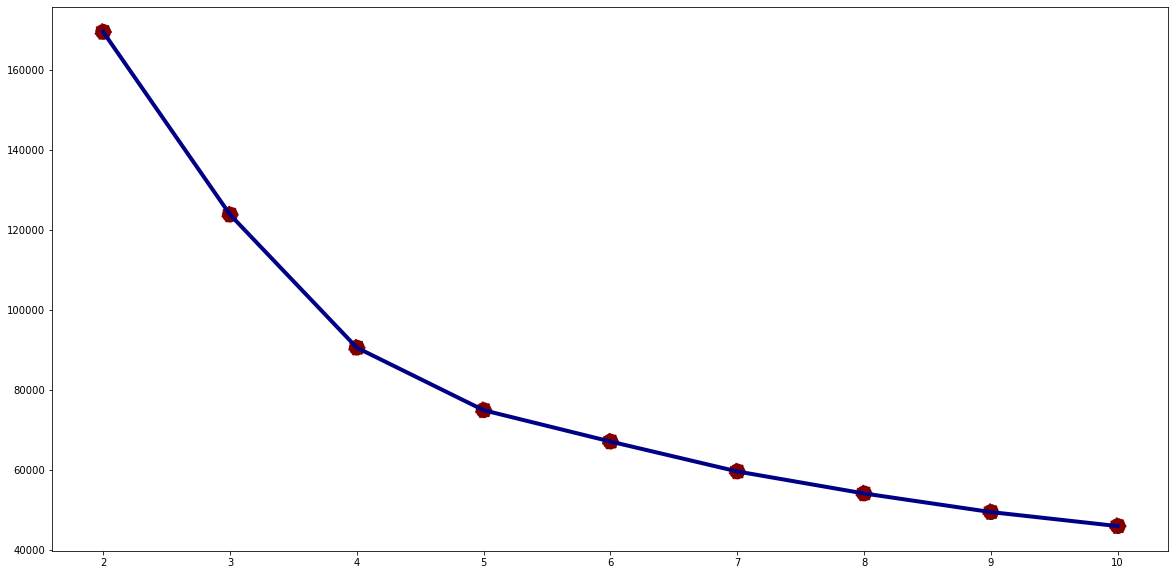

In [201]:
from sklearn.cluster import KMeans
inertia=[]

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(rfm_sc.values)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

In [203]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_pca.values)

clusters = kmeans.labels_

In [204]:
df_rfm['Clusters'] = clusters
data_pca['Clusters'] = clusters

In [205]:
data_pca.head()

,PC1,PC2,Clusters
0,25.997419,4.558595,3
1,14.462335,1.996456,3
2,13.945190,1.855677,3
3,8.560870,1.376252,3
4,15.258833,3.121903,3


# Clusters Analysis

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

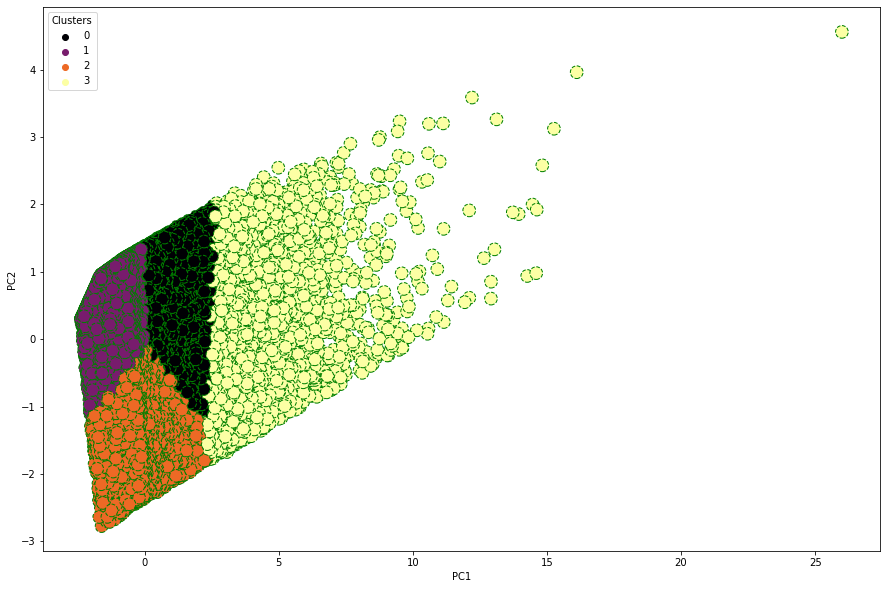

In [206]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC1", y="PC2",
    hue="Clusters",
    edgecolor='green',
    linestyle='--',
    data=data_pca,
    palette='inferno',
    s=160,
    ax=ax
)

In [97]:
display(df_rfm.groupby('Clusters').agg(['mean','median']))

FLIGHT_COUNT           SEG_KM_SUM        Recent_flight         \
                 mean median          mean median          mean median   
Clusters                                                                 
0            3.461284      3   5085.207862   4143    373.452409  362.0   
1            8.710147      7  12504.204866   9577    167.029236  110.0   
2           45.433656     40  65886.774706  56819     24.429337   12.0   
3           11.689843     10  16906.171735  14289     78.219570   54.0   

           Time_as_FF          
                 mean  median  
Clusters                       
0          908.210049   824.0  
1         2467.037399  2418.0  
2         1981.328784  2046.5  
3          936.337206   881.0

- Recency diwakili oleh Recent_time
- Frequency diwakili oleh FLIGHT_COUNT dan Time_as_FF
- Monetary diwakili oleh SEG_KM_SUB

# Conclusion

- kami membagi 3 kategori, <10 = jarang, 10-20 = lumayan, >21 = sering
- cluster 0 dan 1 melakukan penerbangan dibawah 10 dengan penerbangan rata - rata 12.504km
- cluster 3 melakukan penerbangan yang lumayan yaitu 11 kali dengan rata - rata jarak 16.906km
- cluster 2 melakukan penerbangan cukup sering yaitu 45 kali dengan rata - rata jarak 65.886km


# Strategi bisnis

- untuk kategori jarang, tim bisnis dapat melakukan promosi yang membuat user selalu ingin melakukan penerbangan seperti paket destinasi, seasonal promotion dll.
- untuk kategori lumayan, tim bisnis dapat melakukan promosi yang membuat user selalu memilih menggunakan jasa penerbangan kita.
- untuk kategori sering, kita menganggap bahwa kategori ini sudah cukup loyal sehingga kita bisa mengadakan hal hal yang membuat user tetap loyal kepada kita seperti dengan adanya point yang dapat ditukar, premium service dll.